In [10]:
import sktime
from sktime.datasets import load_from_tsfile_to_dataframe
import pandas as pd
import matplotlib.pylab as plt

In [36]:
COLORS = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [6]:
DATA_PATH = "../Data"

bad_train_x, train_y = load_from_tsfile_to_dataframe(
    f"{DATA_PATH}/ECG200/ECG200_TRAIN.ts"
)
bad_test_x, test_y = load_from_tsfile_to_dataframe(
    f"{DATA_PATH}/ECG200/ECG200_TRAIN.ts"
)

In [8]:
X_train = pd.DataFrame(columns=[i for i in range(96)])

for idx, row in bad_train_x.iterrows():
    X_train.loc[idx] = row.values[0].values

X_test = pd.DataFrame(columns=[i for i in range(96)])

for idx, row in bad_test_x.iterrows():
    X_test.loc[idx] = row.values[0].values

In [9]:
X_train.shape, X_test.shape

((100, 96), (100, 96))

In [13]:
y_train = train_y.astype('int')
y_test = test_y.astype('int')

y_train.shape, y_test.shape

((100,), (100,))

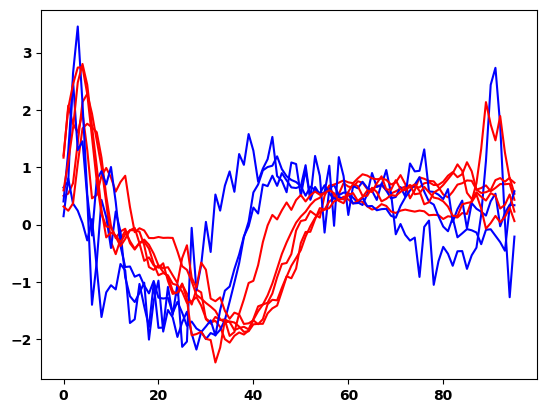

In [15]:
total_pos = 0
total_neg = 0
index = 0
while (total_pos < 5) and (total_neg < 5):
    if y_train[index] == 1:
        total_pos += 1
        plt.plot(X_train.iloc[index], color='blue')
    else:
        total_neg += 1
        plt.plot(X_train.iloc[index], color='red')
    index += 1

In [32]:
tt = X_train.columns

X_train_0 = X_train.copy()[y_train == 1]
mean_0 = X_train_0.mean().values
std_0 = X_train_0.std().values
max_0 = X_train_0.max().values
min_0 = X_train_0.min().values

X_train_1 = X_train.copy()[y_train == -1]
mean_1 = X_train_1.mean().values
std_1 = X_train_1.std().values
max_1 = X_train_1.max().values
min_1 = X_train_1.min().values

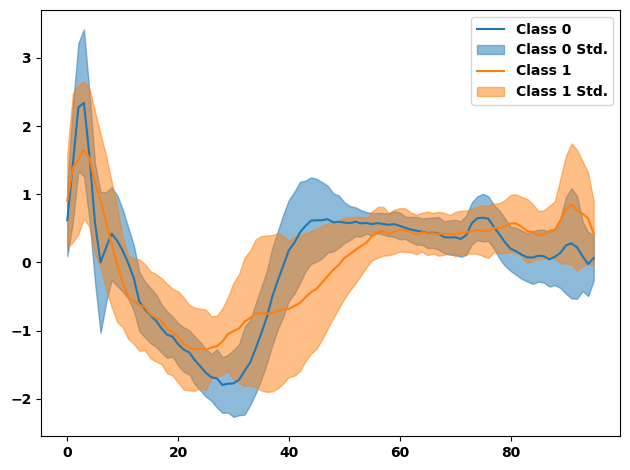

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.plot(tt, mean_0, label='Class 0', color=COLORS[0])
ax.fill_between(tt , mean_0 - std_0, mean_0 + std_0, label='Class 0 Std.', alpha=0.5, color=COLORS[0])

ax.plot(tt, mean_1, label='Class 1', color=COLORS[1])
ax.fill_between(tt, mean_1 - std_1, mean_1 + std_1, label='Class 1 Std.', alpha=0.5, color=COLORS[1])

ax.legend(loc='best')
# ax.set_title(f"Cross correlation dataset (5 Min)")
# ax.set_ylabel(f"correlation")
# ax.set_xlabel("Lag (s)")
fig.tight_layout()
